# Topyfic Downstream Analysis

### *Narges Rezaie*
#### Vignette built on Aug, 2024 with Topyfic version 0.4.13.

The aim of this tutorials is to show how to perform downstream analysis after running the [Snakemake pipeline]().

## Snakemake pipeline
You should run snakemake first and decide which #topic you want to go with. You also need to make sure that you have `train`, `topModel`, and `analysis` objects in your directory.

To be able to use config file, please also make sure you have `yaml` installed.
`pip install pyyaml`

In [18]:
# Read yaml file

import yaml

with open('../config/config.yaml', 'r') as f:
    config = yaml.load(f, Loader=yaml.SafeLoader)

In [3]:
# Load libraries

import Topyfic
import pandas as pd
import scanpy as sc
import numpy as np

In [16]:
# Read and concate input adata(s)

adata = None
if isinstance(config['count_adata'], str):
    adata = sc.read_h5ad(config['count_adata'])
else:
    for adata_name in config['count_adata'].keys():
        tmp = sc.read_h5ad(config['count_adata'][adata_name])
        if adata is None:
            adata = sc.read_h5ad(config['count_adata'][adata_name])
        else:
            adata = adata.concatenate(tmp)
adata

/Users/nargesrezaie/Documents/MortazaviLab/Topyfic/workflow/snakemake/resources/Bridge_LeftCortex_Parse_harmony_annotated_Topyfic_regGene.h5ad
/Users/nargesrezaie/Documents/MortazaviLab/Topyfic/workflow/snakemake/resources/Bridge_LeftCortex_10x_harmony_annotated_Topyfic_regGene.h5ad


AnnData object with n_obs × n_vars = 247072 × 2665
    obs: 'bc', 'subpool', 'bc2_3_sequence', 'bc1_index', 'bc3_sequence', 'bc2_sequence', 'bc1_sequence', 'bc1_well', 'Mouse_Tissue_ID', 'plate', 'Protocol', 'Chemistry', 'well_type', 'Multiplexed_sample1', 'Multiplexed_sample2', 'Row', 'Column', 'Genotype', 'SampleType', 'Tissue', 'Sex', 'Age', 'Notes', 'DOB', 'Age_days', 'Body_weight_g', 'Estrus_cycle', 'Dissection_date', 'Dissection_time', 'Dissector', 'Tissue_weight_mg', 'mult_genotype_1', 'mult_genotype_2', 'mult_genotype', 'batch', 'Mouse_ID', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'n_genes', 'Experiment', 'leiden', 'general_celltype', 'general_CL_ID', 'celltype', 'CL_ID', 'subtype'
    var: 'assay', 'mt', 'gene_name-2', 'n_cells_by_counts-2', 'mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'gene_id-2', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'gene_name-0', 'n_cells_by_counts-0', 'mean_counts-0', 'p

## Read topmodel and analysis models

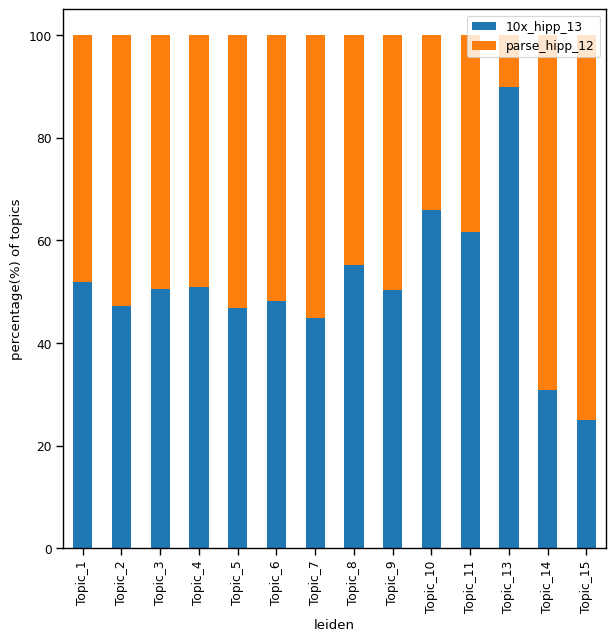

In [5]:
clustering = pd.read_csv(f"{config['top_model']['workdir']}/topic_cluster_mapping.csv", index_col=0)
Topyfic.plot_cluster_contribution(clustering,
                                  portion=True,
                                  feature="assays",
                                  file_format="png",
                                  file_name=f'{config['top_model']['workdir']}/figures/cluster_contribution')

Rest of the analysis inclusing creating analysis object and downstream analysis will be similar to the other toturials.